In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf

In [2]:
file_loc = 'J0805_LRIS_spectra/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'cleaned' in p and 'J0805' in p:
        file_list.append(p)
        #frame = p.split('_')[-2][3:]
        #out_file.append('B0445_LRIS_spectra/spec1d_B0445_lris_frame'+ frame)

In [4]:
file_list

['J0805_LRIS_spectra/J0805_r0043_cleaned.fits']

### This is a system where two galaxies interacting with each other. Don't want velocity dispersion for this system. 

In [5]:
spec = spec2d.Spec2d(file_list[0], hext=1, varext=2)#, xtrim=[60, 140])


Loading file J0805_LRIS_spectra/J0805_r0043_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J0805_LRIS_spectra/J0805_r0043_cleaned.fits (HDU=1)
Final data dimensions (x y): 181 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 181




Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 180 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


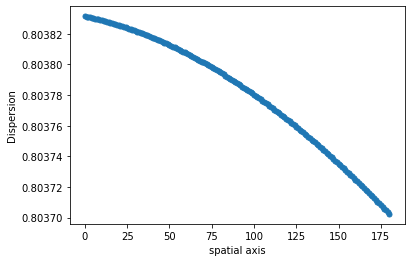

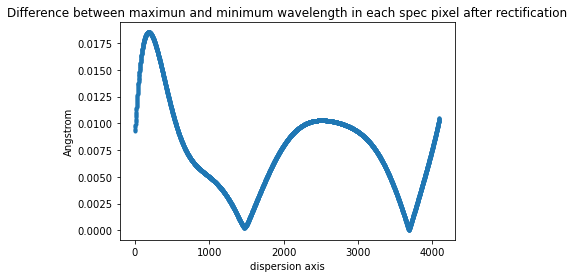

In [6]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=1, wavext=4)

Profile max value (before normalization) 227.628784


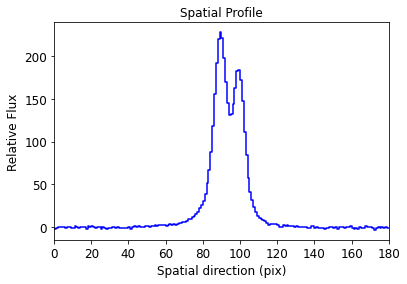


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 227, 87, 3, 4

amplitude=227.000000, x_0=87.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 180, 99, 3,4

amplitude=180.000000, x_0=99.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.25576802)>

    [1]: <Moffat1D(amplitude=223.44663904, x_0=89.94226288, gamma=4.91975329, alpha=1.33058891)>

    [2]: <Moffat1D(amplitude=161.14893277, x_0=100.07948

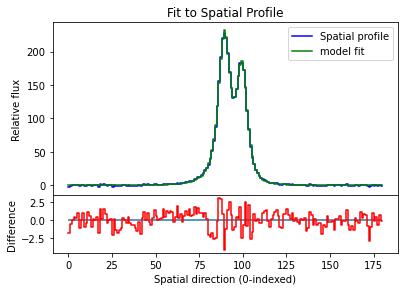

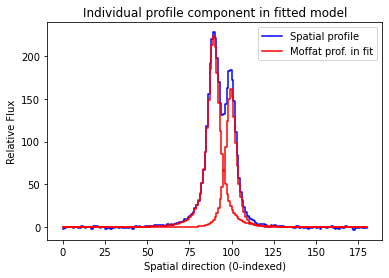


Do you want to start over ? : type yes/no
no


In [24]:
spec.spatial_profile(pixrange=[2100, 2400])
plt.show()
mod = spec.initial_model()


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 3 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


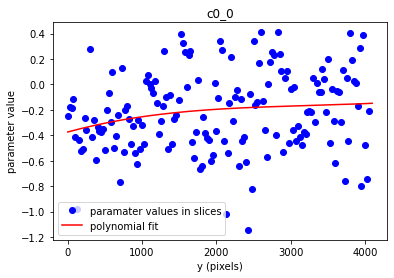

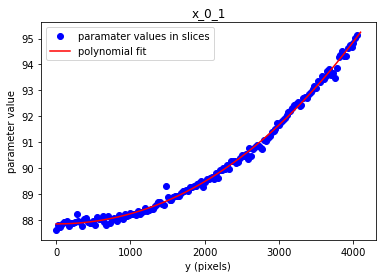

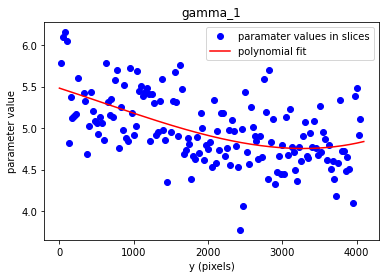

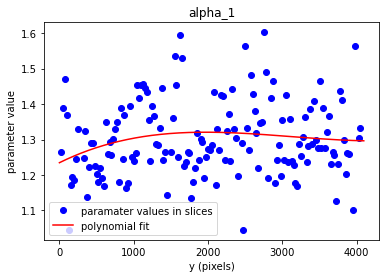

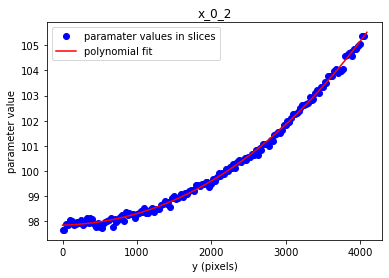

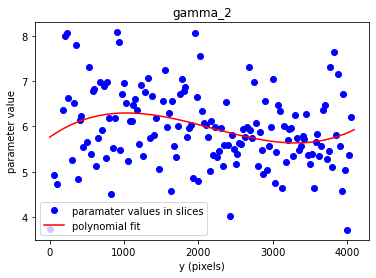

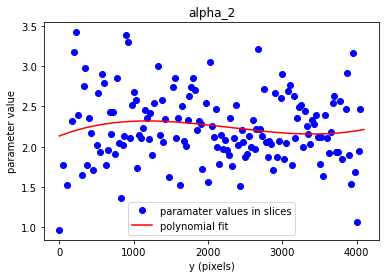

In [25]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[0,4100], polyorder=3)

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5652.21
 Spectrum End:     8928.22
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5652.21
 Spectrum End:     8928.22
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


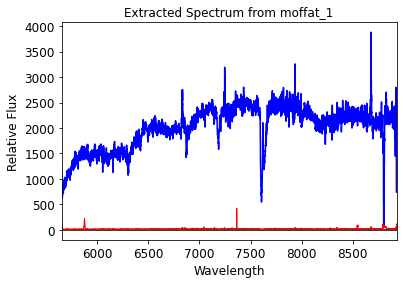

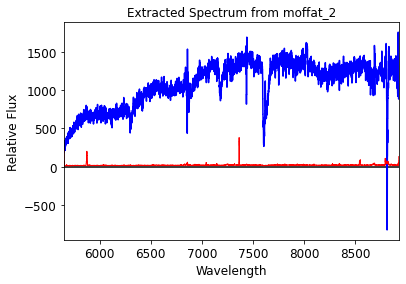

In [26]:
spec.extract(method='modelfit')

In [12]:
sp1 = spec1d.Spec1d(wav=spec.spectra[0][1]['wav'], flux=spec.spectra[0][1]['flux'],
                    var=spec.spectra[0][1]['var'], trimsec=[0, -1])

 Spectrum Start:  5652.21
 Spectrum End:     8927.42
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


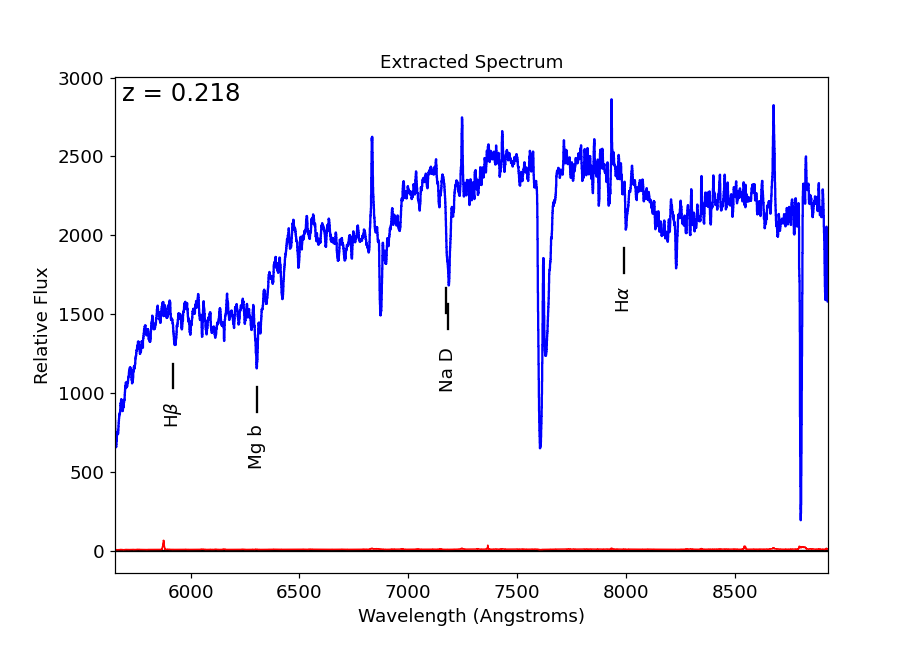


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       5920.70
Mg I (b)      5176.00       6304.37
Na I (D)      5889.95       7173.96
Na I (D)      5895.92       7181.23
H-alpha       6562.80       7993.49



In [20]:
%matplotlib notebook
sp1.smooth(7)
sp1.mark_lines('abs', z=0.218, usesmooth=True)

In [15]:
sp2 = spec1d.Spec1d(wav=spec.spectra[1][1]['wav'], flux=spec.spectra[1][1]['flux'],
                    var=spec.spectra[1][1]['var'], trimsec=[0, -1])

 Spectrum Start:  5652.21
 Spectrum End:     8927.42
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


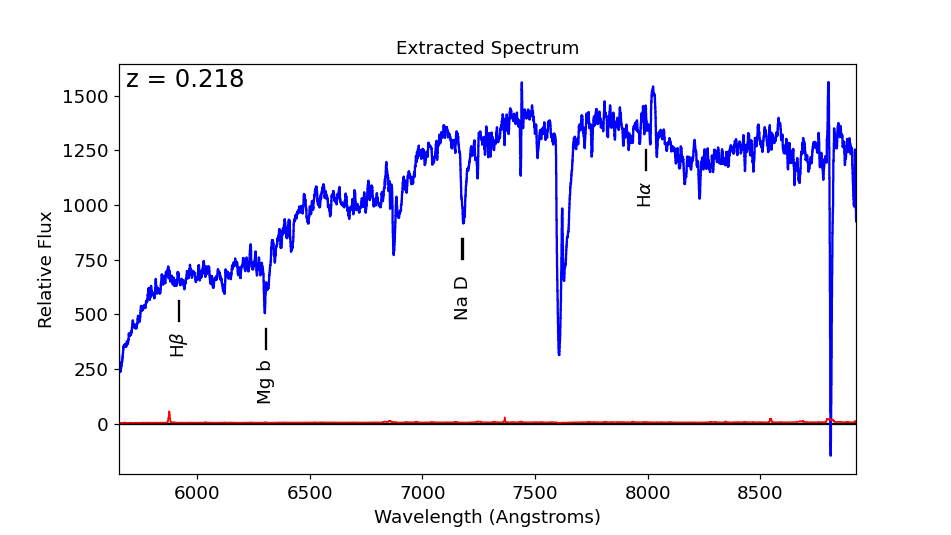


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       5920.70
Mg I (b)      5176.00       6304.37
Na I (D)      5889.95       7173.96
Na I (D)      5895.92       7181.23
H-alpha       6562.80       7993.49



In [21]:
sp2.smooth(7)
sp2.mark_lines('abs', z=0.218, usesmooth=True)